# CardioVascular Disease Detection using Different Machine Learning Algorithms

In [2]:
#Importing Libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
#Importing Dataset
df = pd.read_csv('Cardiovascular Disease.csv', sep = ';') #Sepearte data from one column to different

In [4]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [5]:
df.shape

(70000, 13)

In [6]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [7]:
#Decribing the whole Datset
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#Showing the Number of 0 and 1's, 1(Cardiovascular)
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

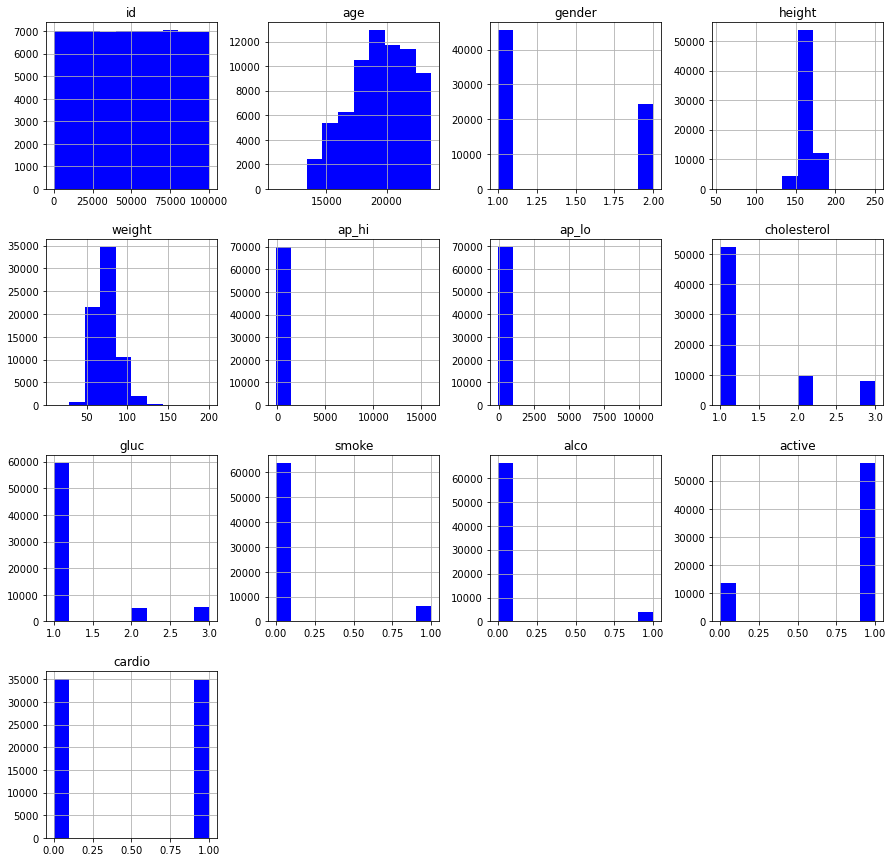

In [9]:
#Plotting the Dataset
df.hist(figsize = (15, 15),color = 'blue')
plt.show()

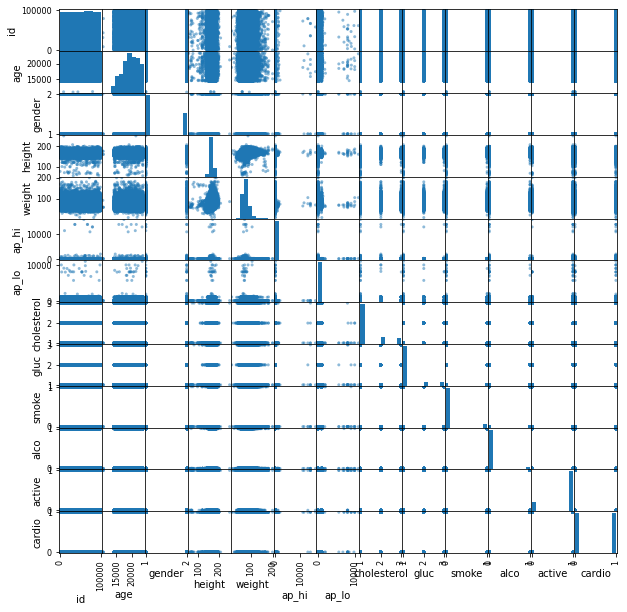

In [10]:
#Scattering the Plots
scatter_matrix(df, figsize = (10, 10))
plt.show()

In [11]:
#Correlation
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


<AxesSubplot:>

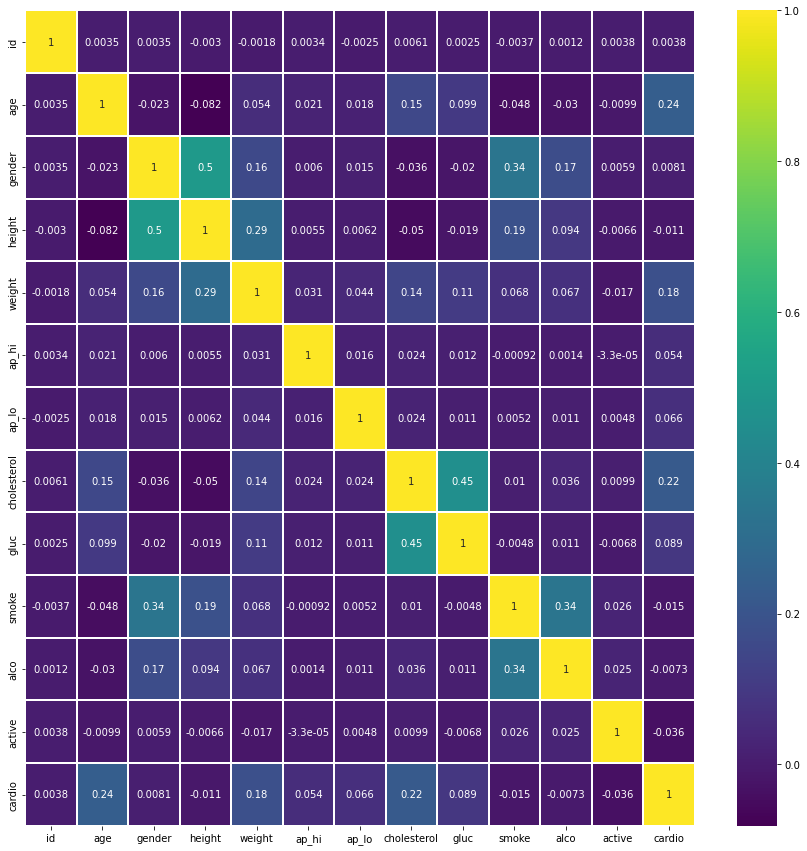

In [12]:
#Correlation Matrix Visualization
corrmat = df.corr()
plt.figure(figsize = (15, 15))
sns.heatmap(corrmat, cmap = 'viridis', annot = True, linewidths = '.25')

J:\ML\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cardio', ylabel='count'>

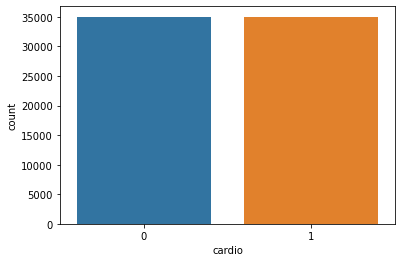

In [13]:
sns.countplot(df['cardio'])

# Visualizing each Columns with the Output Column

<AxesSubplot:xlabel='gender', ylabel='count'>

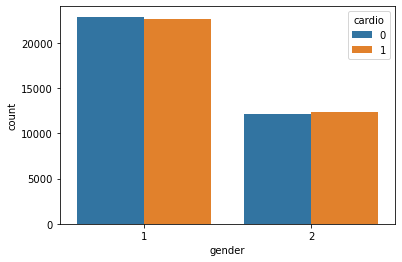

In [14]:
sns.countplot(data=df, x="gender", hue="cardio")

<AxesSubplot:xlabel='age', ylabel='count'>

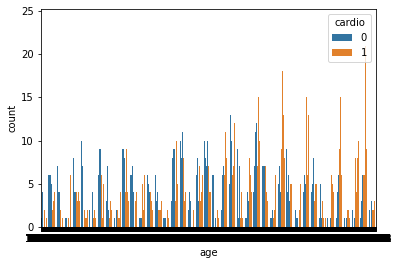

In [15]:
sns.countplot(data = df, x = 'age', hue = 'cardio')

In [16]:
#Converting the age into round figure
df['new_age'] = (df['age']/365).round(0)

In [17]:
df['new_age']

0        50.0
1        55.0
2        52.0
3        48.0
4        48.0
         ... 
69995    53.0
69996    62.0
69997    52.0
69998    61.0
69999    56.0
Name: new_age, Length: 70000, dtype: float64

<AxesSubplot:xlabel='new_age', ylabel='count'>

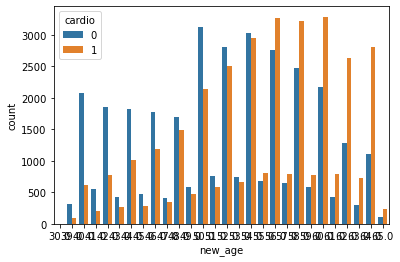

In [18]:
sns.countplot(data = df, x = df['new_age'], hue = 'cardio')

In [19]:
df.drop(['new_age'], axis = 'columns')

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


# Dividing Features and Label Comuns

In [20]:
x = df.drop(['cardio', 'id'], axis = 'columns')

In [21]:
#Feature Columns
x

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,new_age
0,18393,2,168,62.0,110,80,1,1,0,0,1,50.0
1,20228,1,156,85.0,140,90,3,1,0,0,1,55.0
2,18857,1,165,64.0,130,70,3,1,0,0,0,52.0
3,17623,2,169,82.0,150,100,1,1,0,0,1,48.0
4,17474,1,156,56.0,100,60,1,1,0,0,0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,53.0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,62.0
69997,19066,2,183,105.0,180,90,3,1,0,1,0,52.0
69998,22431,1,163,72.0,135,80,1,2,0,0,0,61.0


In [22]:
y = df['cardio']

In [23]:
#Output Column
y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

# Dividing into Training and Testing Data

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = .30, random_state = 1)

In [26]:
#Showing xtrain
xtrain

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,new_age
23561,16136,2,169,71.0,100,80,1,1,1,0,1,44.0
34858,14615,1,158,69.0,140,80,2,1,0,0,1,40.0
54953,20507,1,164,65.0,120,80,1,1,0,0,1,56.0
59230,16720,1,153,53.0,100,60,1,1,0,0,1,46.0
1730,21050,1,159,71.0,140,90,1,1,0,0,1,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...
49100,21289,2,175,78.0,120,80,1,1,0,0,1,58.0
20609,19116,1,164,68.0,120,80,1,1,0,0,0,52.0
21440,18049,2,178,82.0,120,80,1,1,0,0,1,49.0
50057,21957,1,169,77.0,120,80,1,1,0,0,0,60.0


In [27]:
#Showing ytrain
ytrain

23561    0
34858    1
54953    0
59230    0
1730     1
        ..
49100    1
20609    0
21440    0
50057    1
5192     1
Name: cardio, Length: 49000, dtype: int64

# Model Developing using Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rfc = RandomForestClassifier(n_estimators = 100)

In [30]:
rfc.fit(xtrain, ytrain)

RandomForestClassifier()

In [31]:
pred = rfc.predict(xtest)

In [32]:
rfc.score(xtest, ytest)

0.7165714285714285

In [33]:
cr = classification_report(ytest, pred)

In [34]:
print (cr)

              precision    recall  f1-score   support

           0       0.70      0.74      0.72     10352
           1       0.73      0.69      0.71     10648

    accuracy                           0.72     21000
   macro avg       0.72      0.72      0.72     21000
weighted avg       0.72      0.72      0.72     21000



In [35]:
cm = confusion_matrix(ytest, pred)

In [36]:
print (cm)

[[7681 2671]
 [3281 7367]]


Text(33.0, 0.5, 'Actual Label')

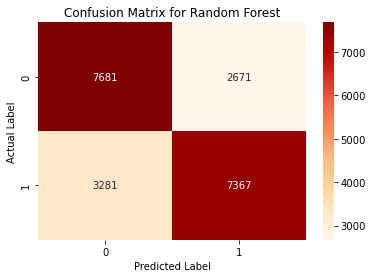

In [37]:
#Visualization of the Confusion Matrix
p = sns.heatmap(pd.DataFrame(cm), annot = True, cmap = 'OrRd', fmt = 'g')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# Model Developing using Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
dtc = DecisionTreeClassifier()

In [40]:
dtc.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [41]:
pred = dtc.predict(xtest)

In [42]:
dtc.score(xtest, ytest)

0.6322380952380953

In [43]:
cr = classification_report(ytest, pred)

In [44]:
print (cr)

              precision    recall  f1-score   support

           0       0.62      0.64      0.63     10352
           1       0.64      0.63      0.63     10648

    accuracy                           0.63     21000
   macro avg       0.63      0.63      0.63     21000
weighted avg       0.63      0.63      0.63     21000



In [45]:
cm = confusion_matrix(ytest, pred)

In [46]:
print (cm)

[[6614 3738]
 [3985 6663]]


Text(33.0, 0.5, 'Actual Label')

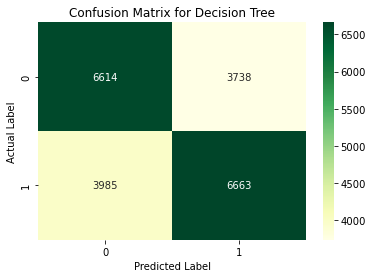

In [47]:
#Visualization of the Confusion Matrix
p = sns.heatmap(pd.DataFrame(cm), annot = True, cmap = 'YlGn', fmt = 'g')
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# Model Developing using Support Vector Machine

In [48]:
from sklearn.svm import SVC

In [49]:
svm = SVC()

In [50]:
svm.fit(xtrain, ytrain)

SVC()

In [51]:
svm.score(xtest, ytest)

0.6046666666666667

In [52]:
pred = svm.predict(xtest)

In [53]:
cr = classification_report(ytest, pred)

In [54]:
print (cr)

              precision    recall  f1-score   support

           0       0.59      0.66      0.62     10352
           1       0.63      0.55      0.58     10648

    accuracy                           0.60     21000
   macro avg       0.61      0.61      0.60     21000
weighted avg       0.61      0.60      0.60     21000



In [55]:
cm = confusion_matrix(ytest, pred)

In [56]:
print (cm)

[[6884 3468]
 [4834 5814]]


Text(33.0, 0.5, 'Actual Label')

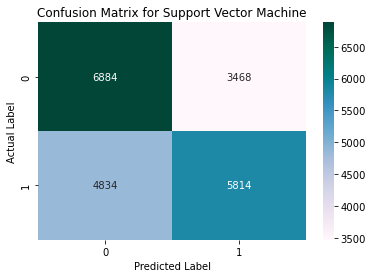

In [57]:
#Visualization of the Confusion Matrix
p = sns.heatmap(pd.DataFrame(cm), annot = True, cmap = 'PuBuGn', fmt = 'g')
plt.title('Confusion Matrix for Support Vector Machine')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# Model Developing using  Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
lr = LogisticRegression()

In [60]:
lr.fit(xtrain, ytrain)

J:\ML\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
lr.score(xtest, ytest)

0.7041904761904761

In [62]:
pred = lr.predict(xtest)

In [63]:
cr = classification_report(ytest, pred)

In [64]:
print (cr)

              precision    recall  f1-score   support

           0       0.68      0.75      0.71     10352
           1       0.73      0.66      0.69     10648

    accuracy                           0.70     21000
   macro avg       0.71      0.70      0.70     21000
weighted avg       0.71      0.70      0.70     21000



In [65]:
cm = confusion_matrix(ytest, pred)

In [66]:
print (cm)

[[7744 2608]
 [3604 7044]]


Text(33.0, 0.5, 'Actual Label')

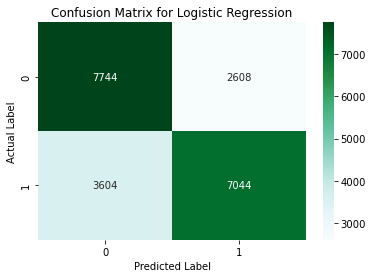

In [67]:
#Visualization of the Confusion Matrix
p = sns.heatmap(pd.DataFrame(cm), annot = True, cmap = 'BuGn', fmt = 'g')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# Model Developing using Gaussian Naive Bayes

In [68]:
from sklearn.naive_bayes import GaussianNB

In [69]:
gnb = GaussianNB()

In [70]:
gnb.fit(xtrain, ytrain)

GaussianNB()

In [71]:
gnb.score(xtest, ytest)

0.5910952380952381

In [72]:
pred = gnb.predict(xtest)

In [73]:
cr = classification_report(ytest, pred)

In [74]:
print (cr)

              precision    recall  f1-score   support

           0       0.55      0.89      0.68     10352
           1       0.74      0.30      0.43     10648

    accuracy                           0.59     21000
   macro avg       0.64      0.60      0.55     21000
weighted avg       0.65      0.59      0.55     21000



In [75]:
cm = confusion_matrix(ytest, pred)

In [76]:
print (cm)

[[9207 1145]
 [7442 3206]]


Text(33.0, 0.5, 'Actual Label')

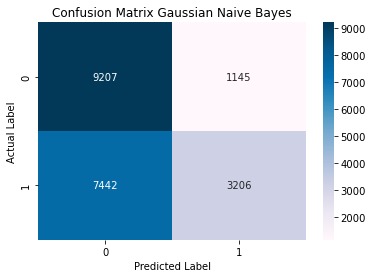

In [77]:
#Visualization of the Confusion Matrix
p = sns.heatmap(pd.DataFrame(cm), annot = True, cmap = 'PuBu', fmt = 'g')
plt.title('Confusion Matrix Gaussian Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# Model Developing using K-Nearest Neighbors

In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
knn = KNeighborsClassifier()

In [80]:
knn.fit(xtrain, ytrain)

KNeighborsClassifier()

In [ ]:
knn.score(xtest, ytest)

In [ ]:
pred = knn.predict(xtest)

In [ ]:
cr = classification_report(ytest, pred)

In [ ]:
print (cr)

In [ ]:
cm = confusion_matrix(ytest, pred)

In [ ]:
print (cm)

In [ ]:
#Visualization of the Confusion Matrix
p = sns.heatmap(pd.DataFrame(cm), annot = True, cmap = 'YlGn', fmt = 'g')
plt.title('Confusion Matrix K-Nearest Neighbors')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# Model Developing using Linear Discriminant Analysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis()

In [ ]:
lda.fit(xtrain, ytrain)

In [ ]:
lda.score(xtest, ytest)

In [ ]:
pred = lda.predict(xtest)

In [ ]:
cr = classification_report(ytest, pred)

In [ ]:
print (cr)

In [ ]:
cm = confusion_matrix(ytest, pred)

In [ ]:
print (cm)

In [ ]:
#Visualization of the Confusion Matrix
p = sns.heatmap(pd.DataFrame(cm), annot = True, cmap = 'RdYlGn', fmt = 'g')
plt.title('Confusion Matrix for Linear Discriminant Analysis')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [ ]:
x = np.array(["RF", "DT", "SVM", "LR", "GNB", "KNN", "LDA"])
y = np.array([72.04, 63.3, 60.1, 70.4, 59.1, 68.2, 64.6])
colors_list = ['Green','Orange', 'Blue', 'Purple', 'Black', 'Brown', 'Olive']
plt.xlabel('Name of the Algorithms', fontname="Bookman Old Style", fontsize=18)
plt.title('Algorithm Comparison', fontname="Bookman Old Style", fontsize=18)
plt.ylabel('Accuracy (%)', fontname="Bookman Old Style", fontsize=18)
pb = plt.bar(x, y, color = colors_list)
for i in range(len(x)):
    plt.text(i, y[i], y[i], ha = "center", va = "bottom", fontname="Bookman Old Style", fontsize = 12)

plt.show()
